In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import model_selection
from sklearn.preprocessing import  LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\yusuf\Desktop\Workspace url/Trendyol_detailed2.csv')
df.head(3)

,Unnamed: 0,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color,Link
0,939,Y21 4gb/64gb,İNOVELSTORE,3399,NaN,4.0,64.0,Android,NaN,NaN,NaN,Mavi,https://www.trendyol.com/vivo/y21-4gb-64gb-p-2...
1,516,Y21 V2111,Çimenli İletişim,3327,NaN,4.0,64.0,Android,NaN,NaN,NaN,Beyaz,https://www.trendyol.com/vivo/y21-v2111-4gb-64...
2,723,1S 2020,Alcatel,2069,1.5-2.0,3.0,32.0,Android,12.5,6.0,3000 - 4000,Gri,https://www.trendyol.com/alcatel/1s-2020-32gb-...


In [3]:
df.drop(columns=['Unnamed: 0'], axis= 1, inplace=True)
df.head(3)

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color,Link
0,Y21 4gb/64gb,İNOVELSTORE,3399,NaN,4.0,64.0,Android,NaN,NaN,NaN,Mavi,https://www.trendyol.com/vivo/y21-4gb-64gb-p-2...
1,Y21 V2111,Çimenli İletişim,3327,NaN,4.0,64.0,Android,NaN,NaN,NaN,Beyaz,https://www.trendyol.com/vivo/y21-v2111-4gb-64...
2,1S 2020,Alcatel,2069,1.5-2.0,3.0,32.0,Android,12.5,6.0,3000 - 4000,Gri,https://www.trendyol.com/alcatel/1s-2020-32gb-...


In [4]:
df.drop(columns=['Link'], axis= 1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1176 non-null   object 
 1   Brand              1176 non-null   object 
 2   Price              1176 non-null   int64  
 3   CPU                482 non-null    object 
 4   RAM                1156 non-null   float64
 5   Storage            1147 non-null   float64
 6   Operating System   1166 non-null   object 
 7   Camera Resolution  872 non-null    float64
 8   Screen Size        807 non-null    float64
 9   Battery Power      433 non-null    object 
 10  Color              1118 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 101.2+ KB


In [6]:
## Get indices for the rows of apple iphone 13 models with null cpu column

pp = df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True)&(df.Model.str.contains('13')==True),'Model'].index

In [7]:
## insert a specific value for the indices defined in the cell above.
df.loc[pp,'CPU'] = 3.2      

In [8]:
## Get indices for the rows of apple iphone S models with null cpu column
rr = df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True)&(df.Model.str.contains('S')),'Model'].index
## insert a specific value for the indices defined above.
df.loc[rr,'CPU'] = 2.6

In [9]:
## Get indices for the rows of apple iphone 12 models with null cpu column
tt = df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True)&(df.Model.str.contains('12')),'Model'].index
## insert a specific value for the indices defined above.
df.loc[tt,'CPU'] = 3.2
df.loc[tt]

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color
92,Iphone 12,Apple,27999,3.2,6.0,128.0,Android,NaN,6.25,NaN,Sar
144,Iphone 12,Apple,32599,3.2,3.0,256.0,iOS,50.0,NaN,NaN,G
146,İphone 12,Apple,30000,3.2,6.0,128.0,iOS,12.5,6.25,NaN,G
179,Iphone 12,Apple,18972,3.2,4.0,64.0,iOS,12.5,6.25,NaN,Mor
192,Iphone se 128gb,Apple,11949,3.2,3.0,128.0,iOS,12.5,NaN,NaN,K
195,Iphone 12,Apple,22249,3.2,4.0,256.0,iOS,12.5,6.25,NaN,Ye


In [10]:
df.loc[(df.Brand=='Apple')& (df.CPU.isna()==True),'CPU'] = 2.8

In [11]:
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)].groupby('Model').count().sort_values('Brand',ascending=False).head()

,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color
Model,,,,,,,,,,
Galaxy S22,20,20,0,20,20,20,16,0,0,20
Galaxy S21,11,11,0,11,11,11,8,1,0,7
Galaxy Z,11,11,0,11,11,11,2,0,0,11
Galaxy A13,9,9,0,9,9,9,8,2,0,9
Galaxy A22,9,9,0,9,9,9,8,0,0,8


In [12]:
## impute values for specific phone models. the inputs are checked online

df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S22'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S21'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy Z'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A73'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A13'),'CPU'] = 2.2 
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A22'),'CPU'] = 2.2
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S22+'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A12'),'CPU'] = 2.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A52s'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy Note20'),'CPU'] = 2.6
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A03s'),'CPU'] = 2.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy J1'),'CPU'] = 1.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A33'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy S20'),'CPU'] = 2.8
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A23'),'CPU'] = 2.4
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A51'),'CPU'] = 2.3
df.loc[(df.Brand=='Samsung')&(df.CPU.isna()==True)&(df.Model=='Galaxy A53'),'CPU'] = 2.4

In [13]:
df.CPU.replace(['0.5-1.0','1.5-2.0','1.0-1.5','2.5-3.2', '2.0-2.5'],[0.8,1.8,1.3,2.8,2.3],inplace=True)

In [14]:
df.loc[df['Camera Resolution'].isna()==True].groupby('Model').count().sort_values('Brand',ascending=False)

,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color
Model,,,,,,,,,,
Redmi Note,40,40,6,39,39,40,0,19,0,37
P13 Blue,13,13,0,12,13,13,0,6,2,13
Iphone 13,13,13,13,13,13,13,0,10,0,8
Galaxy Z,9,9,9,9,9,9,0,0,0,9
Gm 22,8,8,0,8,8,8,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...
Hiking A27,1,1,0,1,1,1,0,0,0,1
Gt Master,1,1,0,1,1,1,0,1,0,1
Galaxy S22+,1,1,1,1,1,1,0,1,0,1


In [15]:
tt=df[df.Model=='Redmi Note'].index

In [16]:
df.loc[tt,'CPU'] = 2.3

In [17]:
df.loc[(df.Model=='P13 Blue')&(df.CPU.isna()==True),'CPU']=2.4

In [18]:
df.loc[(df.Model=='Redmi Note')&(df['Camera Resolution'].isna()==True),'Camera Resolution'] = 48

In [19]:
df.loc[(df.Model=='Iphone 13')&(df['Camera Resolution'].isna()==True),'Camera Resolution'] = 12

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1176 non-null   object 
 1   Brand              1176 non-null   object 
 2   Price              1176 non-null   int64  
 3   CPU                812 non-null    float64
 4   RAM                1156 non-null   float64
 5   Storage            1147 non-null   float64
 6   Operating System   1166 non-null   object 
 7   Camera Resolution  925 non-null    float64
 8   Screen Size        807 non-null    float64
 9   Battery Power      433 non-null    object 
 10  Color              1118 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 101.2+ KB


In [21]:
df[df['Screen Size'].isna()==True].groupby('Model').count().sort_values('CPU',ascending=False)

,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color
Model,,,,,,,,,,
Redmi Note,30,30,30,30,30,30,30,0,0,28
Galaxy S22,20,20,20,20,20,20,16,0,0,20
Galaxy Z,11,11,11,11,11,11,2,0,0,11
P13 Blue,11,11,11,11,11,11,4,0,1,11
Galaxy S21,10,10,10,10,10,10,8,0,0,6
...,...,...,...,...,...,...,...,...,...,...
Gm21 32gb,1,1,0,1,1,1,1,0,0,1
Gm 22,9,9,0,9,9,9,1,0,0,9
Gm 21,4,4,0,4,4,4,2,0,0,4


In [22]:
## impute values for specific phone models. the inputs are checked online

df.loc[(df.Model=='Redmi Note')&(df['Screen Size'].isna()==True),'Screen Size'] = 6
df.loc[(df.Model=='Galaxy S22')&(df['Screen Size'].isna()==True),'Screen Size'] = 6
df.loc[(df.Model=='Galaxy S21')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.2
df.loc[(df.Model=='Galaxy Z')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.7
df.loc[(df.Model=='P13 Blue')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.2
df.loc[(df.Model=='iPhone SE')&(df['Screen Size'].isna()==True),'Screen Size'] = 4.7
df.loc[(df.Model=='Galaxy A73')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.7
df.loc[(df.Model=='Galaxy A22')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.4
df.loc[(df.Model=='Galaxy S22+')&(df['Screen Size'].isna()==True),'Screen Size'] = 6.6

In [23]:
brands=df.groupby('Brand').count().sort_values('Model',ascending=False).index[:10]

In [24]:
df1 =df.loc[df.Brand.isin(brands)==True]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 12 to 1160
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              936 non-null    object 
 1   Brand              936 non-null    object 
 2   Price              936 non-null    int64  
 3   CPU                727 non-null    float64
 4   RAM                934 non-null    float64
 5   Storage            928 non-null    float64
 6   Operating System   934 non-null    object 
 7   Camera Resolution  744 non-null    float64
 8   Screen Size        772 non-null    float64
 9   Battery Power      342 non-null    object 
 10  Color              883 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 87.8+ KB


In [25]:
df.groupby('Color').count().sort_values('Model',ascending=False)

,Model,Brand,Price,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power
Color,,,,,,,,,,
Siyah,270,270,270,172,261,260,268,203,201,109
Mavi,257,257,257,163,256,256,257,208,197,99
Beyaz,157,157,157,119,154,148,153,130,126,68
Ye,119,119,119,93,118,118,119,92,102,37
Gri,114,114,114,85,113,111,112,95,97,38
Mor,43,43,43,31,42,42,43,33,35,14
K,27,27,27,26,27,27,27,24,26,18
Alt,26,26,26,18,24,24,24,22,19,5
G,22,22,22,19,22,22,22,20,18,6


In [26]:
## convert Turkish words into English 
ders = {'Siyah':'Black','Mavi':'Blue','Beyaz':'White','Ye':'Green','Gri':'Gray','Mor':'Purple','K':'Red',
                  'Alt':'Golden','Pembe':'Pink','Sar':'Yellow','Turuncu':'Orange','Metalik':'Metallic','Lacivert':'Blue',
                  'Turkuaz':'Turquoise','Bej':'Cream','Bordo':'Red','Kahverengi':'Brown'}


In [27]:
a= pd.json_normalize(ders).columns
b = pd.json_normalize(ders).T.iloc[:,0].values
b

array(['Black', 'Blue', 'White', 'Green', 'Gray', 'Purple', 'Red',
       'Golden', 'Pink', 'Yellow', 'Orange', 'Metallic', 'Blue',
       'Turquoise', 'Cream', 'Red', 'Brown'], dtype=object)

In [28]:

df.replace(a,b,inplace=True)
df.drop(columns='Battery Power',axis=1,inplace=True)

In [29]:
df.CPU.unique()

array([nan, 1.8, 1.3, 3.2, 2.8, 2.3, 2.6, 0.8, 2.4, 2.2])

In [30]:
df1.drop(columns='Price').head(100)

,Model,Brand,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size,Battery Power,Color
12,iPhone 13,Apple,3.2,6.0,128.0,iOS,7.5,6.25,NaN,K
13,iPhone SE,Apple,1.8,2.0,64.0,iOS,12.5,4.00,1500 - 1800,Siyah
14,iPhone 11,Apple,2.8,4.0,128.0,iOS,12.5,6.00,3000 - 4000,Siyah
15,iPhone 11,Apple,2.8,4.0,64.0,iOS,12.5,6.00,3000 - 4000,Mor
16,iPhone 11,Apple,2.8,4.0,128.0,iOS,12.5,6.00,3000 - 4000,Beyaz
...,...,...,...,...,...,...,...,...,...,...
107,iPhone 13,Apple,3.2,6.0,512.0,iOS,7.5,6.25,NaN,Siyah
108,iPhone 13,Apple,3.2,6.0,512.0,iOS,7.5,6.25,NaN,Pembe
109,Iphone 13,Apple,3.2,4.0,512.0,iOS,12.5,6.25,NaN,Ye
110,iPhone 12,Apple,2.8,6.0,512.0,iOS,12.5,6.00,NaN,Alt


In [31]:
df1 =df.loc[df.Brand.isin(brands)==True]

In [32]:
df.loc[(df.Model.str.contains('13')==True)&(df.Brand=='Apple'),'Model']='iPhone 13'

In [33]:
df1 =df.loc[df.Brand.isin(brands)==True]


In [34]:
df1 = df1.drop(columns='Color')

In [35]:
df1.dropna(inplace=True)

In [36]:
x= df1.drop(columns = ['Price','Model'])
x

,Brand,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size
12,Apple,3.2,6.0,128.0,iOS,7.5,6.25
13,Apple,1.8,2.0,64.0,iOS,12.5,4.00
14,Apple,2.8,4.0,128.0,iOS,12.5,6.00
15,Apple,2.8,4.0,64.0,iOS,12.5,6.00
16,Apple,2.8,4.0,128.0,iOS,12.5,6.00
...,...,...,...,...,...,...,...
1154,Xiaomi,2.3,2.0,32.0,Android,12.5,6.00
1155,Xiaomi,2.3,3.0,64.0,Android,12.5,6.00
1156,Xiaomi,2.3,4.0,128.0,Android,50.0,6.25
1159,Xiaomi,2.3,4.0,128.0,Android,20.0,6.00


In [37]:
le = LabelEncoder()
x1 = le.fit_transform(x.Brand.values)
x2 = le.fit_transform(x['Operating System'].values)

In [38]:
x.Brand = x1
x['Operating System']  = x2    
x    ## define features

,Brand,CPU,RAM,Storage,Operating System,Camera Resolution,Screen Size
12,0,3.2,6.0,128.0,1,7.5,6.25
13,0,1.8,2.0,64.0,1,12.5,4.00
14,0,2.8,4.0,128.0,1,12.5,6.00
15,0,2.8,4.0,64.0,1,12.5,6.00
16,0,2.8,4.0,128.0,1,12.5,6.00
...,...,...,...,...,...,...,...
1154,8,2.3,2.0,32.0,0,12.5,6.00
1155,8,2.3,3.0,64.0,0,12.5,6.00
1156,8,2.3,4.0,128.0,0,50.0,6.25
1159,8,2.3,4.0,128.0,0,20.0,6.00


In [39]:
y = df1.Price   ## define target column

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)  ## split the data into test and train

In [51]:
model = xgb.XGBRegressor()       ##call the model

In [52]:
params = {'max_depth' : [15,20,25],              ## define parameter values for tuning.
         'learning_rate':[0.3,0.5,0.7],
         'n_estimators':[300,400,500],
          'min_child_weight':[6,8,10]
         }

In [53]:
grid = GridSearchCV(model,param_grid=params,verbose=2,cv=3)    ## input the components and create a gridsearchcv module.

In [ ]:
grid.fit(x_train,y_train)             ## fit the data

In [56]:
grid.best_estimator_                   ## the gridsearchcv returns the best parameters values.

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
## pass in the best parameter values.
model_xgb=xgb.XGBRegressor(max_depth=15,min_child_weight=8,n_estimators=500,learning_rate=0.5)    

In [58]:
##  train the data with the tuned parameters.
model_1=model_xgb.fit(x_train,y_train)  

In [59]:
## make predictions

y_pred1=model_1.predict(x_test)

In [60]:
## measure the performance for different metrics.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 score:', metrics.r2_score(y_pred1,y_test))

Mean Absolute Error: 1163.7010962115833
Mean Squared Error: 4535339.210361445
Root Mean Squared Error: 2129.6335859394794
R2 score: 0.953404811728709


In [61]:
## call another model

model1=cb.CatBoostRegressor()

In [62]:
## define parameter values and apply them in a grid module

params1 = {'max_depth':[6,10,15],
          'iterations':[120,150,200],
          'learning_rate':[0.1,0.2,0.3]}

grid1=GridSearchCV(model1,param_grid=params1,verbose=2,cv=3)

In [ ]:
grid1.fit(x_train,y_train)

In [64]:
## get the best parameter values

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid1.best_estimator_)
print("\n The best score across ALL searched params:\n", grid1.best_score_)
print("\n The best parameters across ALL searched params:\n", grid1.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.963281414215737

 The best parameters across ALL searched params:
 {'iterations': 200, 'learning_rate': 0.2, 'max_depth': 10}


In [65]:
## use the best parameter values given by the gridsearchcv module
model_cb=cb.CatBoostRegressor(iterations=200,learning_rate=0.2,max_depth=10)

In [ ]:
## fit the model 
model2=model_cb.fit(x_train,y_train)

In [68]:
## make predictions
y_pred2 = model2.predict(x_test)

In [69]:
## measure performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R2 score:', metrics.r2_score(y_pred2,y_test))

Mean Absolute Error: 1171.9022183556624
Mean Squared Error: 4403613.680271294
Root Mean Squared Error: 2098.4788967895993
R2 score: 0.9533730015988724


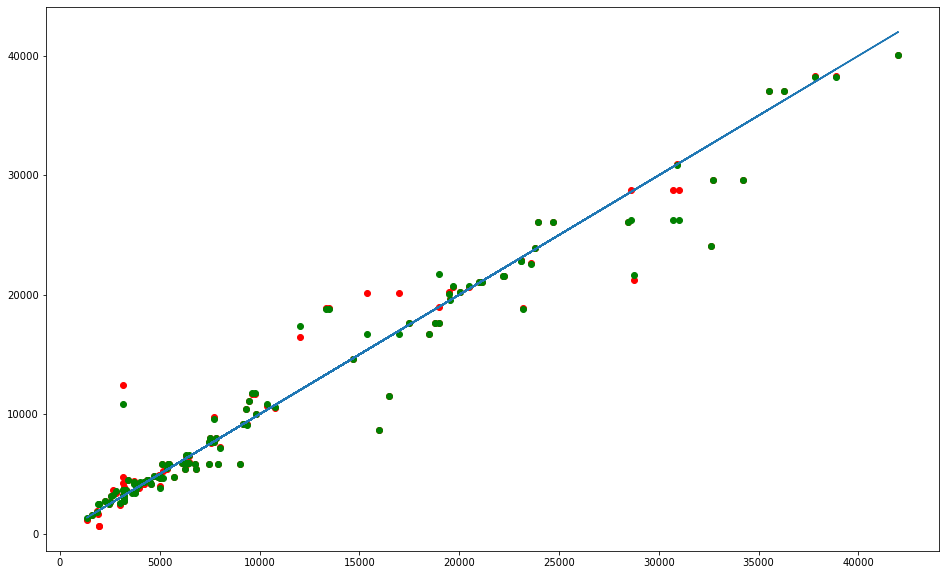

In [70]:
##  Visualize the predictions made by 2 different models. 
## CatBoostRegressor looks to be slightly better than XGBoostRegressor

plt.figure(figsize=(16,10))
plt.plot(y_test,y_test)
plt.scatter(y_test,y_pred1,color='r')
plt.scatter(y_test,y_pred2,color='g')

In [72]:
pairs = {}
for k,v in zip(df1.Brand.unique(),np.arange(9)):
    pairs[k]=v
    
pairs

{'Apple': 0,
 'General Mobile': 1,
 'Huawei': 2,
 'Oppo': 3,
 'POCO': 4,
 'realme': 5,
 'Reeder': 6,
 'Samsung': 7,
 'TCL': 8}

In [75]:
Brand = input('Brand :').lower().title().strip()
Brand = pairs[Brand]
if Brand =='apple':
    OS = 1
else:
    OS = 0
    
Cpu = input('Cpu:')
RAM = input('RAM:')
Storage= input('Storage:')
Cam= input('Camera Resolution:')
Scr= input('Screen Size:')


feat=np.array([Brand,Cpu,RAM,Storage,OS,Cam,Scr])
model2.predict(feat)                            ## input cell for user to define desired features. The model makes prediction

Brand :apple
Cpu:2.8
RAM:6
Storage:64
Camera Resolution:20
Screen Size:6.25


10000.357842293788